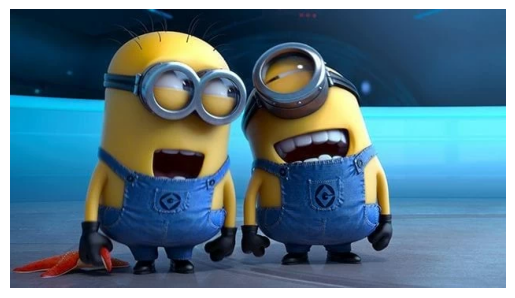

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import math
from random import *
im_array = plt.imread("minion.jpg")
# Part1
# Q1
def AfficherImg(img):# prend en argument une image ensuite elle l'affiche sur l'ecran
    plt.axis("off")
    plt.imshow(img, interpolation="nearest")# afficher l’image à partir du vecteur numpy en utilisant la fonction plt.imshow(
    plt.imshow(img, cmap="gray")  # palette predefinie pour afficher une image
    plt.show()


AfficherImg(im_array)


In [3]:
# Q2
# Ouvrir une image jpg ou bmp on retourne une matrice
def ouvrirImage(chemin):
    img = plt.imread(chemin)
    return img
print(ouvrirImage("minion.jpg"))

[[[  5  24  45]
  [  5  24  45]
  [  5  24  45]
  ...
  [ 45  95 137]
  [ 45  95 137]
  [ 45  95 137]]

 [[  5  24  45]
  [  5  24  45]
  [  5  24  45]
  ...
  [ 45  95 137]
  [ 45  95 137]
  [ 45  95 137]]

 [[  3  25  45]
  [  3  25  45]
  [  3  25  45]
  ...
  [ 45  95 137]
  [ 45  95 137]
  [ 45  95 137]]

 ...

 [[ 67  77 103]
  [ 66  75 102]
  [ 67  77 103]
  ...
  [114 150 186]
  [114 150 186]
  [114 150 186]]

 [[ 69  76 103]
  [ 69  76 103]
  [ 69  76 103]
  ...
  [111 146 182]
  [116 151 187]
  [116 151 187]]

 [[ 69  76 103]
  [ 69  76 103]
  [ 69  76 103]
  ...
  [111 146 182]
  [116 151 187]
  [116 151 187]]]


In [5]:
# Q3
# Sauvgarder une image sous forme jpg ou bmp
def saveImage(img):# prend en argument une image Img, ensuite elle enregistre cette image dans le disque dur
    plt.imsave("minion.png", img)
saveImage(im_array)


[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


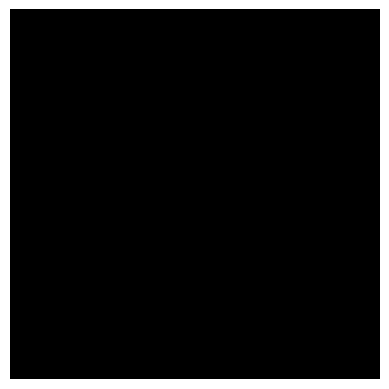

In [9]:
# Part2
# Q4
def image_blanche(h, l):# la fonction retourne une matrice contenant h lignes et l colonnes dont la valeur de chaque pixel est initialisé par 1
    imga = np.zeros((h, l), dtype=np.uint8)
    print(imga)
    return imga
AfficherImg(image_blanche(10,10))


[[1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]]


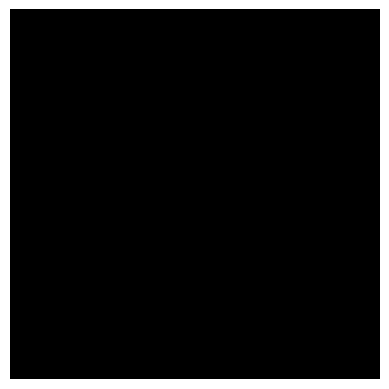

In [10]:
# Q5
def image_noire(h, l):#, la fonction retourne une matrice contenant h lignes et l colonnes dont la valeur de chaque pixel est initialisé par 0
    imga = np.ones([h, l], dtype=np.uint8)
    print(imga)
    return imga
AfficherImg( image_noire(10,10 ))


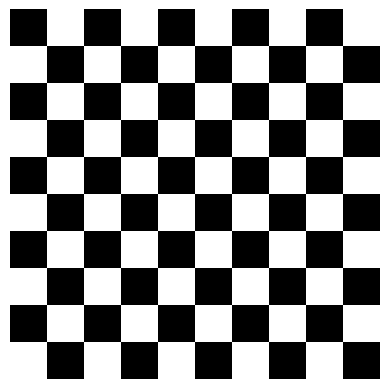

In [11]:
# Q6
def creerImgBlancNoir(h, l):#une fonction  retourne une image noir et blanc dont le contenu de chaque pixel (i,j) est donné par (i+j)%2

    M = [[0] * l for i in range(h)]#initialisation
    for i in range(h):
        for j in range(l):
            M[i][j] = (i + j) % 2
    return M
AfficherImg(creerImgBlancNoir(10,10))

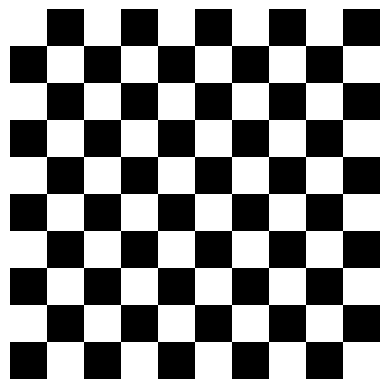

In [12]:
# Q7

def negatif(h, l):#construit le négatif de l’image représentée par une matrice Img. Pour cela, il suffit d'inverser les valeurs de la matrice t (0 devient 1 et 1 devient 0)
    matriceTransposeImageNG = creerImgBlancNoir(h, l).copy()
    for i in range(h):
        for j in range(l):
            matriceTransposeImageNG[i][j] = 255 - matriceTransposeImageNG[i][j]
    return matriceTransposeImageNG
AfficherImg(negatif(10,10))

In [13]:
# Part3
#Q9
def luminance(img):#une fonction faire le luminance d'une image
    H, W = len(img), len(img[0])
    hist = cv2.calcHist([img], [0], None, [256], [0, 255])
    firstTerm = (1 / (H * W))
    secondTerm = 0
    for i in range(255):
        secondTerm += hist[i] * i
    return firstTerm * secondTerm
print(luminance(im_array))


[65.68019]


In [14]:
#Q10
def constrast(img):#une fonction return la constrate d'une image
    H, W = len(img), len(img[0])
    hist = cv2.calcHist([img], [0], None, [256], [0, 255])#(rouge = 255, vert = 0, bleu = 0), vert (rouge = 0, vert = 255, bleu = 0) et bleu (rouge = 0, vert = 0, bleu = 255).
    moy = luminance(img)
    firstTerm = (1 / (H * W))
    secondTerm = 0
    for i in range(255):
        secondTerm += hist[i] * math.pow((i - moy), 2)#on appliquent la reletion pour calculer la constrate

    return math.sqrt(firstTerm * secondTerm)
print(constrast(im_array))

58.152612308987244


In [15]:
#Q11
def profondeur(img):#return la valeur maximale d'un pixel dand l'image
    max = img[0][0][0]#initialisation
    for i in range(len(img)):
        for j in range(len(img[0])):
            for k in range(len(img[0][0])):
                if img[0][0][0] > max:
                    max = img[i][j][k]#le maximal
    return max
print(profondeur(im_array))

5


In [16]:
#Q12
def ouvrir(img):#return la matrice representant l'image
    return np.asarray(img)
print(ouvrir(im_array))

[[[  5  24  45]
  [  5  24  45]
  [  5  24  45]
  ...
  [ 45  95 137]
  [ 45  95 137]
  [ 45  95 137]]

 [[  5  24  45]
  [  5  24  45]
  [  5  24  45]
  ...
  [ 45  95 137]
  [ 45  95 137]
  [ 45  95 137]]

 [[  3  25  45]
  [  3  25  45]
  [  3  25  45]
  ...
  [ 45  95 137]
  [ 45  95 137]
  [ 45  95 137]]

 ...

 [[ 67  77 103]
  [ 66  75 102]
  [ 67  77 103]
  ...
  [114 150 186]
  [114 150 186]
  [114 150 186]]

 [[ 69  76 103]
  [ 69  76 103]
  [ 69  76 103]
  ...
  [111 146 182]
  [116 151 187]
  [116 151 187]]

 [[ 69  76 103]
  [ 69  76 103]
  [ 69  76 103]
  ...
  [111 146 182]
  [116 151 187]
  [116 151 187]]]


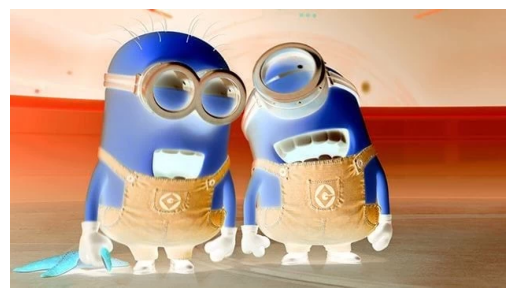

In [17]:
# Part4
#Q13
def inverser(img):#fonction return l'image inverse d'image
    image = np.invert(img)
    return image
AfficherImg(inverser(im_array))

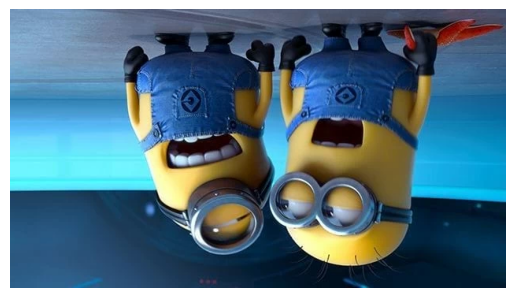

In [18]:
#Q14
def fliph(img):#retourne la transformée de l’image par la symetrie d'axe vertical
    img = cv2.flip(img, -1)
    return img
AfficherImg(fliph(im_array))

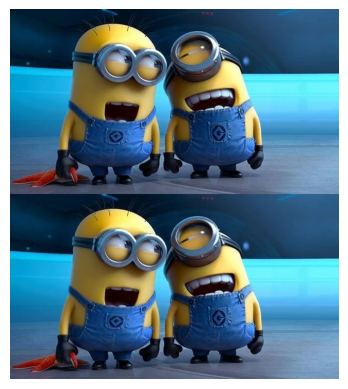

In [19]:
#Q15
def poserV(img1, img2):#return une nouvelle image obtenue en posant img1 sur img2
    return list(img1) + list(img2)#faire la somme des deux listes de chaque image
AfficherImg(poserV(im_array,im_array))

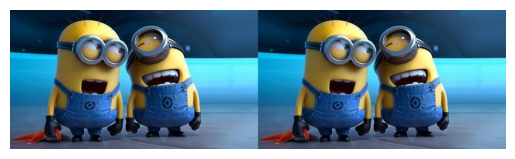

In [20]:
#Q16
def poserH(img1, img2):#return une nouvelle image obtenue en posant img2 à droite de img1
    # renvoie une image a droite de l autre
    image = []#initialisation
    for i in range(len(img1)):
        image.append(list(img1[i]) + list(img2[i]))#on ajoute des elements
    return image
AfficherImg(poserH(im_array, im_array))

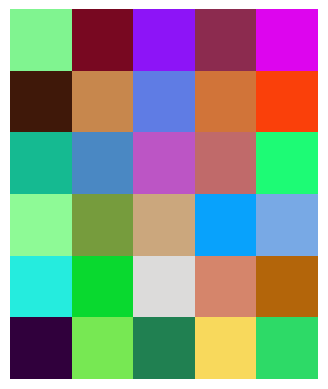

In [21]:

# Part5
# Q22: 50 _ 255 _ 255
# Q23:(3*N*M) car chaque pixel ste represente par 3 octets * le nbrs de colonnes * le nbrs de lignes
# Q24
def initimagergb(imgrgb):#permettant d'initialiser et de renvoyer le tableau imageRGB a trois dimensions
    x = randrange(1, 10)# d'une manière aléatoire onutilisant cette fonction
    imgrgb = []
    imgrgb = [[[0, 0, 0] for i in range(x)] for j in range(randrange(1, 10))]
    for i in range(len(imgrgb)):
        for j in range(x):
            for k in range(3):#3 parceque on a tableaux de trois dimensions
                s = randrange(0, 255)
                imgrgb[i][j][k] = s
    return imgrgb


M = [[[210, 100, 255], [100, 50, 255], [90, 90, 255], [90, 90, 255], [90, 90, 255], [90, 80, 255]],
     [[190, 255, 89], [201, 255, 29], [200, 255, 100], [100, 255, 90], [20, 255, 200], [100, 255, 80]],
     [[255, 0, 0], [255, 0, 0], [255, 0, 0], [255, 0, 0], [255, 0, 0], [255, 0, 0]]]

AfficherImg(initimagergb(im_array))


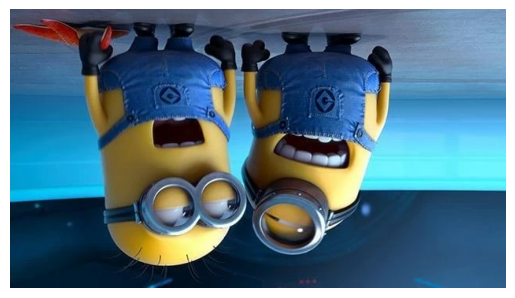

In [22]:
#Q25
def symetriehor(img):#une fonction retourne une image symétrique à l'image img par rapport à l'axe horizontal
    return img[::-1]
AfficherImg(symetriehor(im_array))


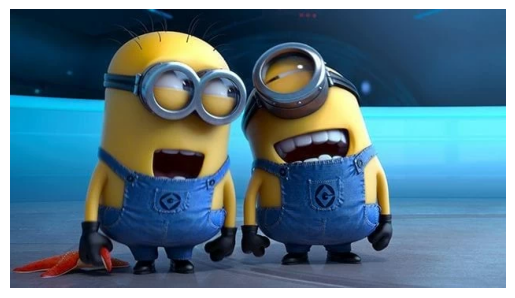

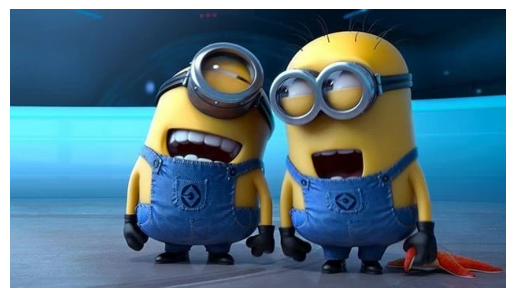

In [24]:
#Q25
def symetriever(img):#une fonction retourn une image symetrique a l'image par rapport a l'axe vertical)
    img = img.copy()
    for i in range(len(img)):
        for j in range(len(img[0]) // 2):
            for k in range(3):
                img[i][j][k], img[i][-j - 1][k] = img[i][-j - 1][k], img[i][j][k]
    return img

AfficherImg(im_array)
AfficherImg(symetriever(im_array))


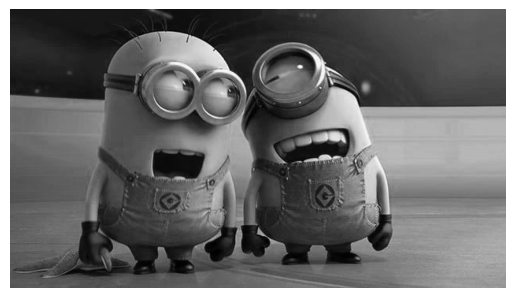

In [27]:
#Q26
def grayscale(imgRGB):#une fonction retourn une image en niveaux de gris ,sous forme de tableau a deux dimensions
    p = [[0] * len(imgRGB[0]) for i in range(len(imgRGB))]#initialisation
    for i in range(len(imgRGB)):
        for j in range(len(imgRGB[0])):
            p[i][j] = int((max(imgRGB[i][j]) + int(min(imgRGB[i][j]))) / 2)# la moyenne de ces valeurs maximales et minimales
    return p
AfficherImg(grayscale(im_array))